<a href="https://colab.research.google.com/github/daniel-saunders-phil/dowry-game/blob/main/Reproducible_data_analysis_similiarity_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reproducible data analysis

Welcome. This script reproduces all the charts found in the paper "When is Similiarity-Biased Social Learning Adaptively Advantageous?" by Daniel Saunders. Cells need to be run in order for them to communicate correctly so I recommend going to Runtime -> Run All to generate plots. After you've regenerated the analysis, then it's easier to tinker with anything you might be curious about.

In [16]:
# packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# plot settings

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14

## Random pairing rate sensitivity analysis

First, I want to see how the behavior of the model changes as you adjust the rate of random pairing. Higher random pairing means players play with the out-group more often.

In [17]:
# the raw data is stored on a github repository

url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20github%20version%20sensitivity_to_random_pairing-table.csv"

# extract the data from the csv into a DataFrame

data = pd.read_csv(url,header=6)
data

,[run number],spatial?,random-pairing,mr_learning_strategy,conditional_strategies?,initial_proportion_ethnic_learning,plays_per_learn,mr_strategy,[step],success?,collapse?
0,4,False,0.1,0,False,0.5,1,0,1115,True,False
1,1,False,0.1,0,False,0.5,1,0,1137,True,False
2,2,False,0.1,0,False,0.5,1,0,1331,True,False
3,3,False,0.1,0,False,0.5,1,0,1418,True,False
4,6,False,0.1,0,False,0.5,1,0,938,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,False,1.0,0,False,0.5,1,0,13,False,True
4996,4997,False,1.0,0,False,0.5,1,0,16,False,True
4997,4998,False,1.0,0,False,0.5,1,0,21,False,True
4998,4999,False,1.0,0,False,0.5,1,0,18,False,True


In [18]:
# check to see if the experiment worked properly
# trials should either end in success? = true or collapse? = true.
# trials that hit the time limit (5000 steps) do not provide a clear picture.

time_limit = data['[step]'] == 5000
np.sum(time_limit)

# one trial hit the time limit
# so the results should be pretty reliable.

1

In [19]:
# pull out the success column
# and the pairing column

success = data["success?"]
pairing = data["random-pairing"]

# for each of the random pairing parameter values simulated,
# pull out the subset of the data and find the mean
# success rate

params = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

success_by_pairing = [success[pairing == p] for p in params]
mean_success_by_pairing_param = [np.mean(l) for l in success_by_pairing]

mean_success_by_pairing_param

[0.974, 0.92, 0.71, 0.286, 0.046, 0.002, 0.0, 0.0, 0.0, 0.0]

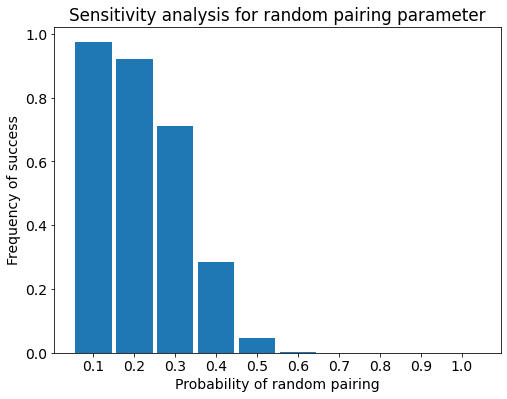

In [20]:
# generate a bar chart from mean_success_by_pairing_params

plt.bar(params,mean_success_by_pairing_param,width=.09)

# add labels and aesthetic features

plt.xticks(params)
plt.ylabel('Frequency of success')
plt.xlabel('Probability of random pairing')
plt.title('Sensitivity analysis for random pairing parameter')
plt.show()

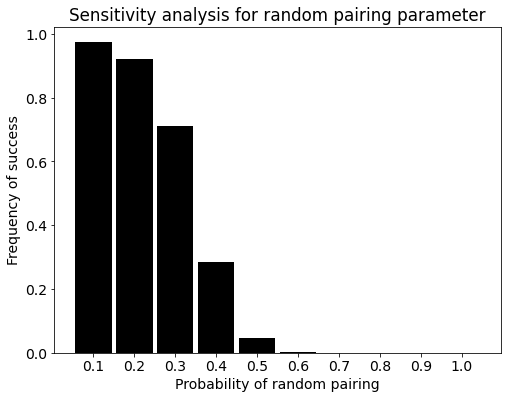

In [21]:
# generate a bar chart from mean_success_by_pairing_params

plt.bar(params,mean_success_by_pairing_param,width=.09,color='black')

# add labels and aesthetic features

plt.xticks(params)
plt.ylabel('Frequency of success')
plt.xlabel('Probability of random pairing')
plt.title('Sensitivity analysis for random pairing parameter')
plt.show()

*Figure 1: Bar heights represent the frequency of simulation experiments that
ended in uniform similarity-biased social learning. 500 trials were conducted
at each 0.1 increment of the random pairing parameter between 0 and 1. The
results show similarity-biased social learning is more likely to evolve when most
interactions take place within the group.*

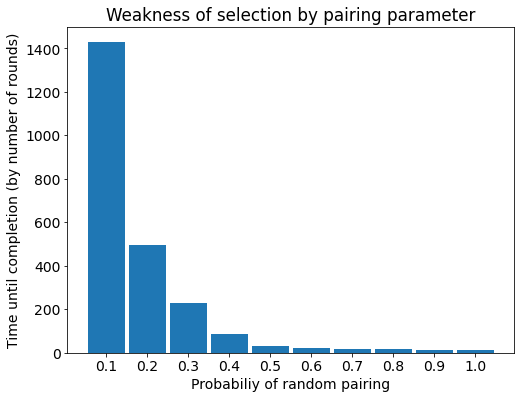

In [22]:
# repeat the above steps but for the average run time of a simulation

steps = data['[step]']

steps_by_pairing = [steps[pairing == p] for p in params]
mean_steps_by_pairing_param = [np.mean(l) for l in steps_by_pairing]

plt.bar(params,mean_steps_by_pairing_param,width=.09)
plt.xticks(params)
plt.title("Weakness of selection by pairing parameter")
plt.ylabel('Time until completion (by number of rounds)')
plt.xlabel('Probabiliy of random pairing')
plt.show()

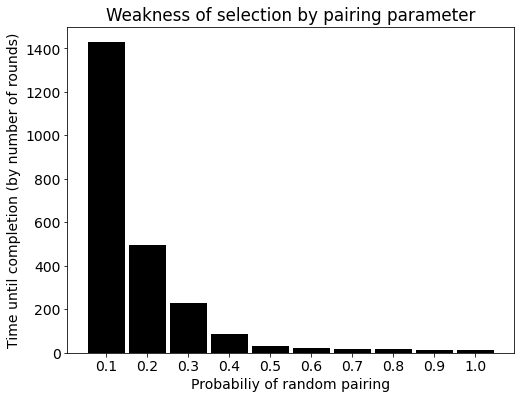

In [23]:
# repeat the above steps but for the average run time of a simulation

steps = data['[step]']

steps_by_pairing = [steps[pairing == p] for p in params]
mean_steps_by_pairing_param = [np.mean(l) for l in steps_by_pairing]

plt.bar(params,mean_steps_by_pairing_param,width=.09,color='black')
plt.xticks(params)
plt.title("Weakness of selection by pairing parameter")
plt.ylabel('Time until completion (by number of rounds)')
plt.xlabel('Probabiliy of random pairing')
plt.show()

*Figure 2: Bar heights represent the average number of rounds it takes the
model to reach a stable state, either the distinctive strategy outcome or the
assimilation outcome. These data were extracted from the same experiments
depicted in figure 1. As random pairing decreases, the model takes exponentially
more time to reach a stable state. Tall bars indicate weak selection.*

## Initial frequency sensitivity analysis

Second, I wanted to see how the model changes as the initial frequency of the learning bias changes. These simulation adjusted the proportion of players employing ethnicity-biased learning from [0.1, 0.5].

In [24]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20github%20version%20sensitivity_to_initial_bias-table.csv"

# extract data

data = pd.read_csv(url,header=6)
data

,[run number],spatial?,random-pairing,mr_learning_strategy,conditional_strategies?,initial_proportion_ethnic_learning,plays_per_learn,mr_strategy,[step],success?,collapse?
0,3,False,0.2,0,False,0.1,1,0,14,False,True
1,1,False,0.2,0,False,0.1,1,0,14,False,True
2,4,False,0.2,0,False,0.1,1,0,14,False,True
3,2,False,0.2,0,False,0.1,1,0,17,False,True
4,5,False,0.2,0,False,0.1,1,0,15,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2495,2497,False,0.2,0,False,0.5,1,0,239,True,False
2496,2498,False,0.2,0,False,0.5,1,0,487,True,False
2497,2491,False,0.2,0,False,0.5,1,0,1250,True,False
2498,2499,False,0.2,0,False,0.5,1,0,653,True,False


In [25]:
# check to see if the experiment worked properly
# trials should either end in success? = true or collapse? = true.
# trials that hit the time limit (5000 steps) do not provide a clear picture.

time_limit = data['[step]'] == 5000
np.sum(time_limit)

# zero trials hit the time limit - nice.

0

In [26]:
initial = data['initial_proportion_ethnic_learning']

params = [0.1,0.2,0.3,0.4,0.5]

summary = []

# find the frequency of success at each
# level of initial frequency
# and put that frequency into the summary list

for p in params:
  selector = initial == p
  filtered_data = data[selector]
  success_by_param = np.mean(filtered_data['success?'])
  summary.append(success_by_param)

# display the summary

summary

[0.0, 0.016, 0.15, 0.616, 0.932]

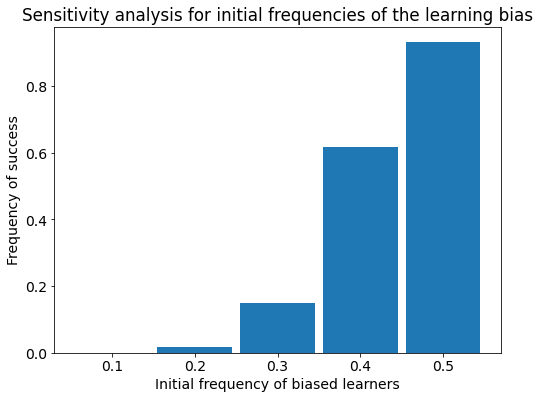

In [27]:
# a bar chart visualizing that summary

plt.bar(params,summary,width=.09)
plt.xticks(params)
plt.xlabel('Initial frequency of biased learners')
plt.ylabel('Frequency of success')
plt.title("Sensitivity analysis for initial frequencies of the learning bias")
plt.show()

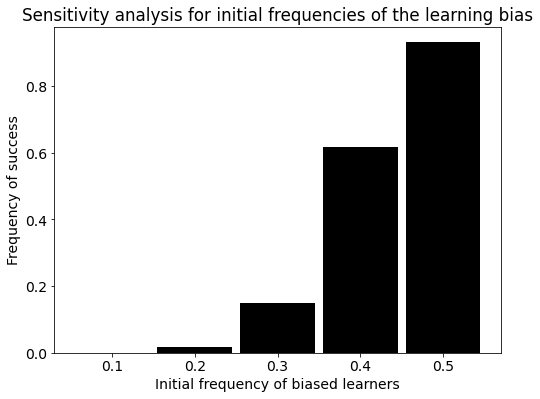

In [28]:
plt.bar(params,summary,width=.09,color="black")
plt.xticks(params)
plt.xlabel('Initial frequency of biased learners')
plt.ylabel('Frequency of success')
plt.title("Sensitivity analysis for initial frequencies of the learning bias")
plt.show()

*Figure 3: Bar heights represent the frequency of simulation experiments that
ended in uniform similarity-biased social learning. 500 simulations were run
at each parameter value. The random pairing parameter was set to 0.2. As
the initial frequency of the learning bias decreases, so does the probability that learning bias will spread*

## Population Size

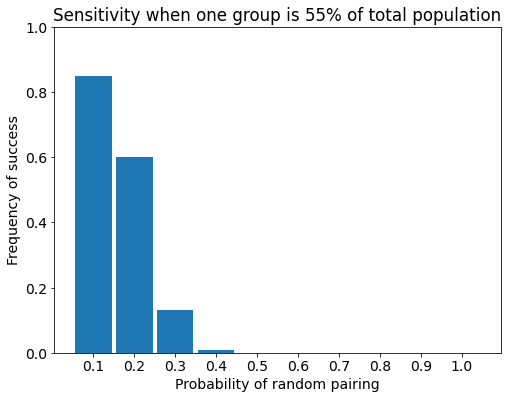

In [33]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20bjps%20revisions%20-%20varying%20population%20sizes%20sensitivity_to_random_pairing_majority_minority-table.csv"

data = pd.read_csv(url,header=6)
data

selector = data['shift'] == 0.1
data = data[selector]

# check to see if the experiment worked properly
# trials should either end in success? = true or collapse? = true.
# trials that hit the time limit (5000 steps) do not provide a clear picture.

time_limit = data['[step]'] == 5000
#print('num hit time limit:',np.sum(time_limit))

# pull out the success column
# and the pairing column

success = data["success?"]
pairing = data["random-pairing"]

# for each of the random pairing parameter values simulated,
# pull out the subset of the data and find the mean
# success rate

params = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

success_by_pairing = [success[pairing == p] for p in params]
mean_success_by_pairing_param = [np.mean(l) for l in success_by_pairing]

mean_success_by_pairing_param

# generate a bar chart from mean_success_by_pairing_params

plt.bar(params,mean_success_by_pairing_param,width=.09)

# add labels and aesthetic features

plt.xticks(params)
plt.ylabel('Frequency of success')
plt.xlabel('Probability of random pairing')
plt.title('Sensitivity when one group is 55% of total population')
plt.ylim(0,1)
plt.show()



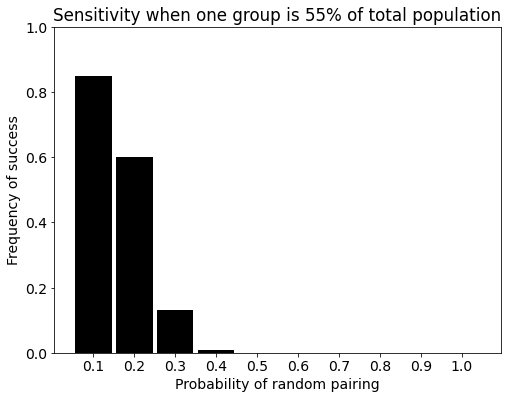

In [34]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20bjps%20revisions%20-%20varying%20population%20sizes%20sensitivity_to_random_pairing_majority_minority-table.csv"

data = pd.read_csv(url,header=6)
data

selector = data['shift'] == 0.1
data = data[selector]

# check to see if the experiment worked properly
# trials should either end in success? = true or collapse? = true.
# trials that hit the time limit (5000 steps) do not provide a clear picture.

time_limit = data['[step]'] == 5000
#print('num hit time limit:',np.sum(time_limit))

# pull out the success column
# and the pairing column

success = data["success?"]
pairing = data["random-pairing"]

# for each of the random pairing parameter values simulated,
# pull out the subset of the data and find the mean
# success rate

params = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

success_by_pairing = [success[pairing == p] for p in params]
mean_success_by_pairing_param = [np.mean(l) for l in success_by_pairing]

mean_success_by_pairing_param

# generate a bar chart from mean_success_by_pairing_params

plt.bar(params,mean_success_by_pairing_param,width=.09,color="black")

# add labels and aesthetic features

plt.xticks(params)
plt.ylabel('Frequency of success')
plt.xlabel('Probability of random pairing')
plt.title('Sensitivity when one group is 55% of total population')
plt.ylim(0,1)
plt.show()

*Figure 4: Bar heights represent the frequency of simulation experiments that ended in
uniform similarity-biased social learning. 100 simulations were run at each parameter
value. The initial frequency of the learning bias was set to 0.5. Comparison with figure
1 reveals unequal population sizes have a substantial negative impact on the probability
of success.*

## Playing to learning ratio

Third, I wanted to see how the behavior of the model changes when players play more often than they learn.

In [29]:
url = "https://raw.githubusercontent.com/daniel-saunders-phil/dowry-game/main/data/ethnicity%20bias%20learning%20-%20github%20version%2010_plays_per_learn-table.csv"

# extract the data

data = pd.read_csv(url,header=6)
data

,[run number],spatial?,random-pairing,mr_learning_strategy,conditional_strategies?,initial_proportion_ethnic_learning,plays_per_learn,mr_strategy,[step],success?,collapse?
0,4,False,0.1,0,False,0.1,10,0,18,False,True
1,3,False,0.1,0,False,0.1,10,0,20,False,True
2,6,False,0.1,0,False,0.1,10,0,21,False,True
3,5,False,0.1,0,False,0.1,10,0,27,False,True
4,2,False,0.1,0,False,0.1,10,0,48,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2495,2499,False,0.5,0,False,0.5,10,0,78,False,True
2496,2497,False,0.5,0,False,0.5,10,0,185,True,False
2497,2496,False,0.5,0,False,0.5,10,0,213,True,False
2498,2498,False,0.5,0,False,0.5,10,0,288,True,False


In [30]:
# check to see if the experiment worked properly
# trials should either end in success? = true or collapse? = true.
# trials that hit the time limit (5000 steps) do not provide a clear picture.

time_limit = data['[step]'] == 5000
np.sum(time_limit)

# zero trials hit the time limit - nice.

0

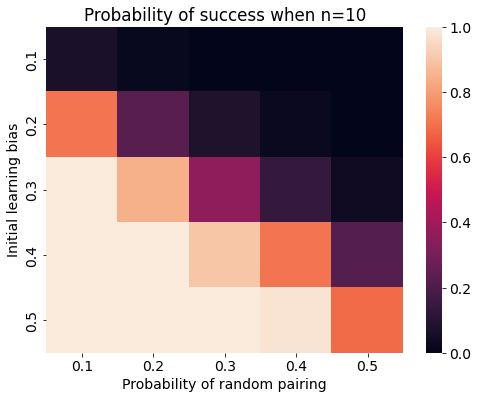

In [31]:
params = [0.1,0.2,0.3,0.4,0.5]
indexer = [0,1,2,3,4]

# pull out the subsets of the data for each initial proportion

selectors = [data['initial_proportion_ethnic_learning'] == p for p in params]

summary = []
for j in indexer:
    filtered_data = data[selectors[j]]

    # then pull out the subset of that subset for each random pairing level
    # so we are only deal with the 100 simulations that correspond to
    # a particular pair of pairing and initial parameter values.

    selector_2 = [filtered_data['random-pairing'] == p for p in params]

    frequency_of_success = []
    for i in indexer:
        filtered_data_2 = filtered_data[selector_2[i]]

        # then extract the frequency of success

        frequency_of_success.append(np.mean(filtered_data_2['success?']))

    # generate a 5x5 matrix

    summary.append(frequency_of_success)

# plug the matrix into a dataframe
    
summary = pd.DataFrame(summary,columns=params,index=params)
summary

# and generate a heatmap from matrix

sns.heatmap(summary)
plt.title("Probability of success when n=10")
plt.ylabel("Initial learning bias")
plt.xlabel("Probability of random pairing")
plt.show()

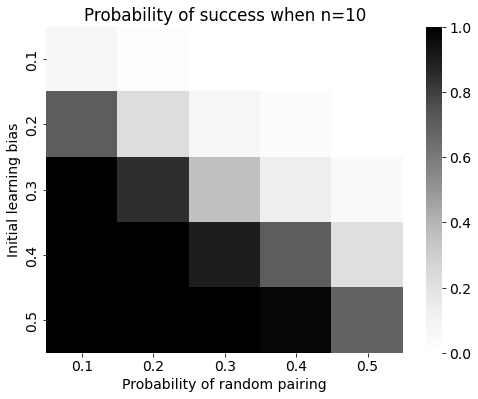

In [32]:
params = [0.1,0.2,0.3,0.4,0.5]
indexer = [0,1,2,3,4]

# pull out the subsets of the data for each initial proportion

selectors = [data['initial_proportion_ethnic_learning'] == p for p in params]

summary = []
for j in indexer:
    filtered_data = data[selectors[j]]

    # then pull out the subset of that subset for each random pairing level
    # so we are only deal with the 100 simulations that correspond to
    # a particular pair of pairing and initial parameter values.

    selector_2 = [filtered_data['random-pairing'] == p for p in params]

    frequency_of_success = []
    for i in indexer:
        filtered_data_2 = filtered_data[selector_2[i]]

        # then extract the frequency of success

        frequency_of_success.append(np.mean(filtered_data_2['success?']))

    # generate a 5x5 matrix

    summary.append(frequency_of_success)

# plug the matrix into a dataframe
    
summary = pd.DataFrame(summary,columns=params,index=params)
summary

# and generate a heatmap from matrix

sns.heatmap(summary,cmap='Greys')
plt.title("Probability of success when n=10")
plt.ylabel("Initial learning bias")
plt.xlabel("Probability of random pairing")
plt.show()